In [22]:
from ast import Mod
from enum import Enum
import random
import uuid
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from mesa import Agent, Model
from mesa.time import RandomActivation
from mesa.datacollection import DataCollector
from mesa.space import NetworkGrid

from mesa.batchrunner import batch_run

from abm_moloch_governance.model import *

In [5]:
params = {
    "num_nodes": 5, # number of DAO members
    "avg_node_degree": 3, # how many other DAO members is each connected to?
    "proposal_dimension": 2, # number of categories considered in evaluating the value of the proposal
    "evaluation_period": 3, # num. time steps for agents to evaluate the proposal
    "num_proposals": 12
}

## Size of community effect

In [36]:
df_list = []

for n in range(5, 50, 5):
    row_list = []
    params = {
        "num_nodes": n, # number of DAO members
        "avg_node_degree": 3, # how many other DAO members is each connected to?
        "proposal_dimension": 2, # number of categories considered in evaluating the value of the proposal
        "evaluation_period": 3, # num. time steps for agents to evaluate the proposal
        "num_proposals": 10
    }
    model = MolochDAO(**params)

    for i in range(50):
        model.run()
        # print(model.votes)
        percent_passed = sum(model.votes) / len(model.votes)
#         print(n, i, sum(model.votes) / len(model.votes)) # count how many proposals passed in this simulation run
        row_list = [n, i, percent_passed]
        df_list.append(row_list)
        model.votes = [] # reset and get ready for the next run    


In [37]:
df_list = pd.DataFrame(df_list, columns = ["num_members", "trial", "pct_proposals_passed"])
df_list.head()

,num_members,trial,pct_proposals_passed
0,5,0,0.7
1,5,1,0.6
2,5,2,0.6
3,5,3,0.6
4,5,4,0.6


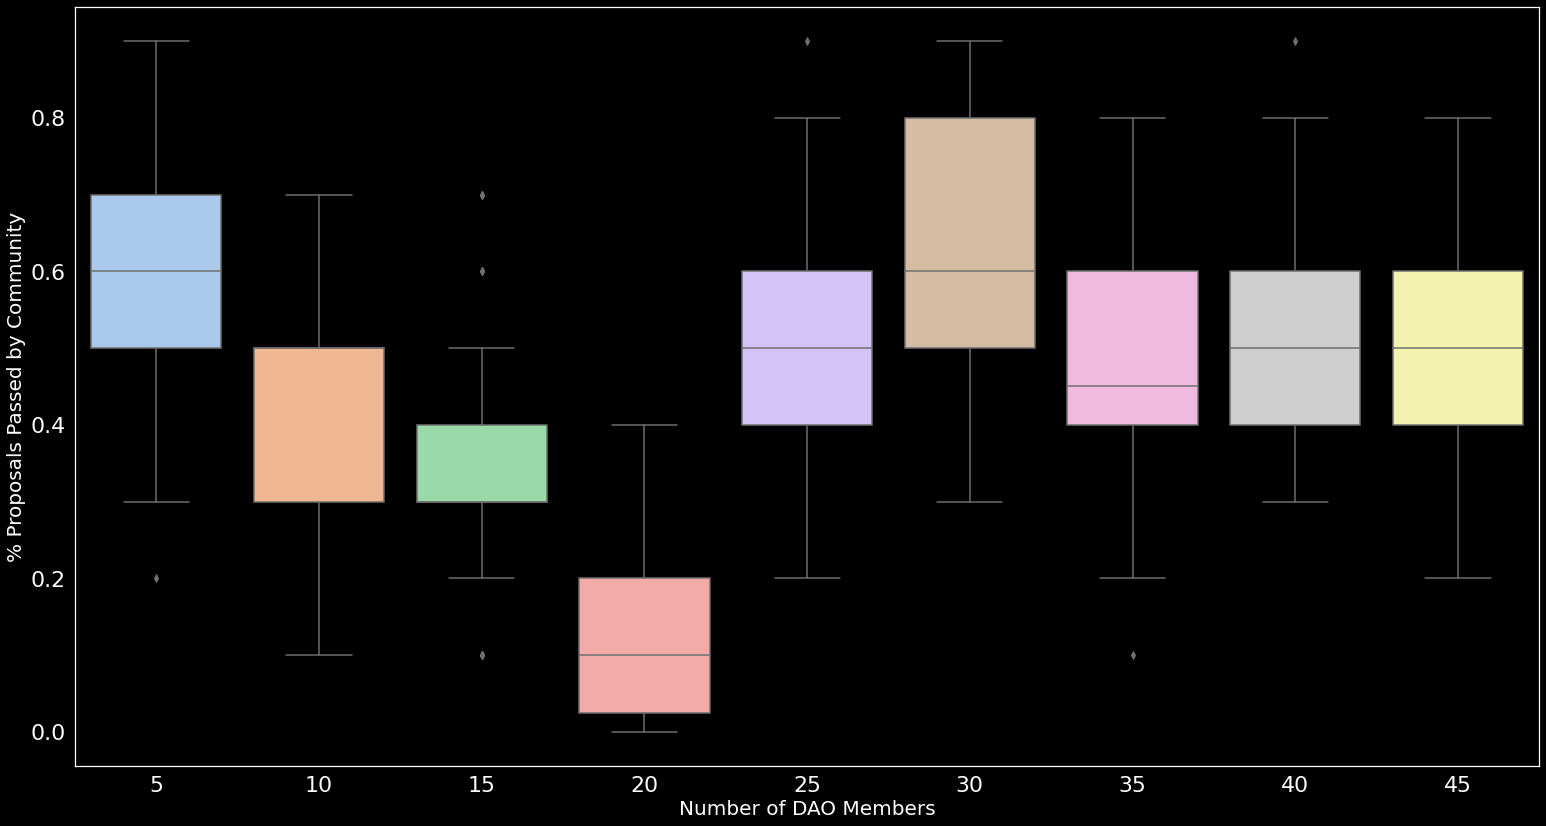

In [56]:
plt.rcParams["figure.figsize"] = [22, 12]
plt.rcParams["figure.autolayout"] = True
# sns.set_style("dark")
sns.set(font_scale = 2)
plt.style.use("dark_background")
# tips = sns.load_dataset("tips")
ax = sns.boxplot(x="num_members", y="pct_proposals_passed", palette="pastel", data=df_list)
# plt.ylim(5, 30)
ax.grid(False)
ax.set_xlabel("Number of DAO Members", fontsize = 20)
ax.set_ylabel("% Proposals Passed by Community", fontsize = 20)
plt.show()

In [11]:
for n in range(0, 30, 5):
    print(n)

0
5
10
15
20
25


In [7]:
model_df

,true_proposal_value,realized_proposal_value,percent_passing_votes
0,0.000000,0.000000,None
1,1.710191,0.000000,None
2,1.710191,0.000000,None
3,1.710191,0.000000,None
4,2.492750,1.710191,None
...,...,...,...
356,123.601141,100.380365,None
357,123.601141,100.380365,None
358,124.673839,101.495248,None
359,124.673839,101.495248,None
